## Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

spot_tracks = pd.read_csv("../../../assets/data/spot_tracks_20.csv")
spot_tracks.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


### Code checking using pycodestyle_magic

In [2]:
%load_ext pycodestyle_magic
%pycodestyle_on
%flake8_on
%flake8_on --max_line_length 79

### Basic dataset check

In [3]:
# Check dataframe columns
print(spot_tracks.columns)

Index(['Unnamed: 0', 'artist', 'album', 'track_name', 'track_id', 'energy',
       'danceability', 'key', 'loudness', 'acousticness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'genre'],
      dtype='object')


In [4]:
# Check dataframe shape
print(spot_tracks.shape)

(50, 17)


In [5]:
spot_tracks.describe()

,Unnamed: 0,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,14.57738,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.00000,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,12.25000,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,24.50000,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,36.75000,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,49.00000,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


## Data cleansing

### Dropping 'Unnamed: 0' column

In [6]:
spot_tracks = spot_tracks.drop(["Unnamed: 0"], axis=1)
spot_tracks.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [7]:
print(spot_tracks.columns.unique())
print("Updated number of features (columns): ", spot_tracks.shape[1])

Index(['artist', 'album', 'track_name', 'track_id', 'energy', 'danceability',
       'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'genre'],
      dtype='object')
Updated number of features (columns):  16


### Key feature

Since key feature in this dataframe is likely representing the key of musical composition, it is better to convert it to a string type.

In [8]:
# Define the mapping dictionary
key_mapping = {
    0: 'C',
    1: 'C#/Db',
    2: 'D',
    3: 'D#/Eb',
    4: 'E',
    5: 'F',
    6: 'F#/Gb',
    7: 'G',
    8: 'G#/Ab',
    9: 'A',
    10: 'A#/Bb',
    11: 'B'
}

# Map the 'key' column using the mapping dictionary
spot_tracks['key'] = spot_tracks['key'].map(key_mapping)

# Print the first few rows to verify the mapping
print(spot_tracks['key'].head())

0    C#/Db
1    F#/Gb
2    A#/Bb
3    G#/Ab
4        B
Name: key, dtype: object


In [9]:
spot_tracks.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,C#/Db,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,F#/Gb,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,A#/Bb,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,G#/Ab,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,B,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [10]:
# Check for missing values by columns
missing_values = spot_tracks.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64


In [11]:
# Check for duplicate rows (samples)
duplicate_samples = spot_tracks[spot_tracks.duplicated()]
print("Duplicate Samples:")
print(duplicate_samples)

Duplicate Samples:
Empty DataFrame
Columns: [artist, album, track_name, track_id, energy, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms, genre]
Index: []


In [12]:
# Check for duplicate columns (features)
duplicate_features = spot_tracks.columns[spot_tracks.columns.duplicated()]
print("Duplicate Features:")
print(duplicate_features)

Duplicate Features:
Index([], dtype='object')


### How many observations are there in this dataset?

In [13]:
# Using shape() method to get the amount of rows (axis 0) are in the dataset
num_observations = spot_tracks.shape[0]
print("Number of observations:", num_observations)

Number of observations: 50


### How many features this dataset has?

In [14]:
# Using shape() method to get the amount of columns (axis 1) are in the dataset
num_features = spot_tracks.shape[1]
print("Number of features:", num_features)

Number of features: 16


### Checking all columns data types

In [15]:
column_dtypes = spot_tracks.dtypes
print("Data types of each column:")
print(column_dtypes)

Data types of each column:
artist               object
album                object
track_name           object
track_id             object
energy              float64
danceability        float64
key                  object
loudness            float64
acousticness        float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object


The script below can be used to uniform features data types. In this case, we can observe the column 'duration_ms' have the data type as *int* as the other ones are *float*.

I decided to not change it since I think it would not be necessary for this analysis.

In [ ]:
# Uniforming columns key and duration_ms types to float
# spot_tracks['duration_ms'] = spot_tracks['duration_ms'].astype(int)
# print(spot_tracks['duration_ms'].dtype)

### Which of the features are categorical?

Columns with data type 'object' often represents strings or categorical variables. Therefore this analysis takes the data type *'object'* to determine the ones that are categorical.

In [16]:
categorical_features = (
    spot_tracks.select_dtypes(include=["object"])
    .columns.tolist()
)
print("Categorical Features:", categorical_features)

Categorical Features: ['artist', 'album', 'track_name', 'track_id', 'key', 'genre']


### Which of the features are numeric?

The other way around, the data type *'int'* and *'float'* are used to determine the numeric features. Here, we select the data types, by excluding the *'object'* ones.

In [17]:
# Same as above, but excluding columns with data type 'object'
categorical_features = (
    spot_tracks.select_dtypes(exclude=["object"])
    .columns.tolist()
)
print("Categorical Features:", categorical_features)

Categorical Features: ['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


### Are there any artists that have more than 1 popular track? If yes, which and how many?

In [18]:
songs_by_artist = spot_tracks.artist.value_counts()
artists_with_multiple_songs = songs_by_artist[songs_by_artist > 1]
print("Artists with more than one song: ", artists_with_multiple_songs)

# Count the number of artists with more than one song
num_artists_with_multiple_songs = len(artists_with_multiple_songs)
print(
    "Total of artists with more than 1 popular song: ",
    num_artists_with_multiple_songs
)

Artists with more than one song:  artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64
Total of artists with more than 1 popular song:  7


### Who was the most popular artist?

In [19]:
songs_by_artist = spot_tracks.artist.value_counts()
artists_with_multiple_songs = songs_by_artist[songs_by_artist > 2]
print("The most popular artist(s) are :", artists_with_multiple_songs)

The most popular artist(s) are : artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Name: count, dtype: int64


### How many artists in total have their songs in the top 50?

In [20]:
num_unique_artists = spot_tracks['artist'].nunique()
print("The total number of artists with songs in the top 50:",
      num_unique_artists)

The total number of artists with songs in the top 50: 40


### Are there any albums that have more than 1 popular track? If yes, which and how many?

In [21]:
# Count the occurrences of each track in the dataset
track_counts = spot_tracks['album'].value_counts()

# Filter albums with more than one popular track
popular_albums = track_counts[track_counts > 1]

if not popular_albums.empty:
    print("Albums with more than one popular track:")
    for album, count in popular_albums.items():
        print(f"Album: {album}, Number of popular tracks: {count}")
else:
    print("No albums have more than one popular track.")

Albums with more than one popular track:
Album: Future Nostalgia, Number of popular tracks: 3
Album: Hollywood's Bleeding, Number of popular tracks: 2
Album: Fine Line, Number of popular tracks: 2
Album: Changes, Number of popular tracks: 2


### How many albums in total have their songs in the top 50?

In [22]:
# nunique to return the unique number of albums
total_albums = spot_tracks["album"].nunique()

print("Total number of albums with songs in the top 50:", total_albums)

Total number of albums with songs in the top 50: 45


### Which tracks have a danceability score above 0.7?

In [23]:
# Filter tracks with danceability score above 0.7
high_danceability = spot_tracks[spot_tracks["danceability"] > 0.7]

# Print the tracks with danceability score above 0.7
print("Tracks with danceability score above 0.7:")
print(high_danceability[["track_name", "danceability"]])

# Determine the number of tracks with danceability score above 0.7
num_tracks_above_07 = len(high_danceability)

# Print the number of tracks
print("Number of tracks with danceability score above 0.7:",
      num_tracks_above_07)

Tracks with danceability score above 0.7:
                                       track_name  danceability
1                                    Dance Monkey         0.825
2                                         The Box         0.896
3                           Roses - Imanbek Remix         0.785
4                                 Don't Start Now         0.793
5                    ROCKSTAR (feat. Roddy Ricch)         0.746
7                death bed (coffee for your head)         0.726
8                                         Falling         0.784
10                                           Tusa         0.803
13                                Blueberry Faygo         0.774
14                       Intentions (feat. Quavo)         0.806
15                                   Toosie Slide         0.830
17                                         Say So         0.787
18                                       Memories         0.764
19                     Life Is Good (feat. Drake)         0.79

### Which tracks have a danceability score below 0.4?

In [24]:
# Filter tracks with danceability score below 0.4
low_danceability = spot_tracks[spot_tracks["danceability"] < 0.4]

# Print the tracks with danceability score below 0.4
print("Tracks with danceability score below 0.4:")
print(low_danceability[["track_name", "danceability"]])

# Determine the number of tracks with danceability score below 0.4
num_tracks_below_04 = len(low_danceability)

# Print the number of tracks
print("Number of tracks with danceability score below 0.4:",
      num_tracks_below_04)

Tracks with danceability score below 0.4:
              track_name  danceability
44  lovely (with Khalid)         0.351
Number of tracks with danceability score below 0.4: 1


### Which tracks have their loudness above -5?

In [25]:
# Filter tracks with loudness above -5
loudness_above = spot_tracks[spot_tracks["loudness"] > -5]

# Print the tracks with loudness above -5
print("Tracks with loudness above -5:")
print(loudness_above[["track_name", "loudness"]])

# Determine the number of tracks with loudness above -5
num_tracks_loudness_above = len(loudness_above)

# Print the number of tracks
print("Number of tracks with loudness above -5:", num_tracks_loudness_above)

Tracks with loudness above -5:
                                       track_name  loudness
4                                 Don't Start Now    -4.521
6                                Watermelon Sugar    -4.209
10                                           Tusa    -3.280
12                                        Circles    -3.497
16                                  Before You Go    -4.858
17                                         Say So    -4.577
21                                      Adore You    -3.675
23                         Mood (feat. iann dior)    -3.558
31                                 Break My Heart    -3.434
32                                       Dynamite    -4.410
33               Supalonely (feat. Gus Dapperton)    -4.746
35                Rain On Me (with Ariana Grande)    -3.764
37  Sunflower - Spider-Man: Into the Spider-Verse    -4.368
38                                          Hawái    -3.454
39                                        Ride It    -4.258
40       

### Which tracks have their loudness below -8?

In [26]:
# Filter tracks with loudness below -8
loudness_below = spot_tracks[spot_tracks["loudness"] < -8]

# Print the tracks with loudness below -8
print("Tracks with loudness below -8:")
print(loudness_below[["track_name", "loudness"]])

# Determine the number of tracks with loudness below -8
num_tracks_loudness_below = len(loudness_below)

# Print the number of tracks
print("Number of tracks with loudness below -8:", num_tracks_loudness_below)

Tracks with loudness below -8:
                                        track_name  loudness
7                 death bed (coffee for your head)    -8.765
8                                          Falling    -8.756
15                                    Toosie Slide    -8.820
20                Savage Love (Laxed - Siren Beat)    -8.520
24                             everything i wanted   -14.454
26                                         bad guy   -10.965
36                             HIGHEST IN THE ROOM    -8.764
44                            lovely (with Khalid)   -10.109
47  If the World Was Ending - feat. Julia Michaels   -10.086
Number of tracks with loudness below -8: 9


### Which track is the longest?

In [27]:
# Find the index of the row with the maximum duration_ms
longest_track_index = spot_tracks["duration_ms"].idxmax()

# Get the track information for the longest track
longest_track_info = spot_tracks.loc[longest_track_index]

print("The longest track is:")
print(longest_track_info[["track_name", "duration_ms"]])

The longest track is:
track_name     SICKO MODE
duration_ms        312820
Name: 49, dtype: object


### Which track is the shortest?

In [28]:
# Find the index of the row with the maximum duration_ms
shortest_track_index = spot_tracks["duration_ms"].idxmin()

# Get the track information for the longest track
shortest_track_info = spot_tracks.loc[shortest_track_index]

print("The shortestt track is:")
print(shortest_track_info[["track_name", "duration_ms"]])

The shortestt track is:
track_name     Mood (feat. iann dior)
duration_ms                    140526
Name: 23, dtype: object


### Which genre is the most popular?

In [29]:
# Count the occurrences of each genre
genre_counts = spot_tracks["genre"].value_counts()
print(genre_counts)

# Get the most popular genre
most_popular_genre = genre_counts.idxmax()
num_occurrences = genre_counts.max()

print("The most popular genre is:", most_popular_genre)
print("Number of occurrences:", num_occurrences)

genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
R&B/Soul                               2
 Electro-pop                           2
Nu-disco                               1
R&B/Hip-Hop alternative                1
Pop/Soft Rock                          1
Pop rap                                1
Hip-Hop/Trap                           1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Chamber pop                            1
Name: count, dtype: int64
The most popular genre is: Pop
Number of occurrences: 14


### Which genres have just one song on the top 50?

In [32]:
# Count the occurrences of each genre
genre_counts = spot_tracks["genre"].value_counts()

# Filter out the genres with only one occurrence
genres_with_one_song = genre_counts[genre_counts == 1]

print("Genres with only one song in the top 50:")
print(genres_with_one_song)

Genres with only one song in the top 50:
genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64


### How many genres in total are represented in the top 50?

In [30]:
# Count the number of unique genres
num_unique_genres = spot_tracks["genre"].nunique()

print("Number of genres represented in the top 50:", num_unique_genres)

Number of genres represented in the top 50: 16


### Which features are strongly positively correlated?

The correlation shows how each numeric feature correlates with every other numeric feature in the dataset.

In this case, it was used the following criteria to identify positive and negative correlation:

Perfect Positive Correlation (1): A correlation coefficient of 1 indicates a perfect positive linear relationship between two variables. This means that as one variable increases, the other variable also increases proportionally, and vice versa.

Strong Positive Correlation (> 0.7): Typically, a correlation coefficient greater than 0.8 is considered a strong positive correlation. This suggests that there is a strong tendency for the two variables to move in the same direction, but it may not be a perfect linear relationship.

Perfect Negative Correlation (-1): A correlation coefficient of -1 indicates a perfect negative linear relationship between two variables. This means that as one variable decreases, the other variable also decreases proportionally, and vice versa.

Strong Negative Correlation (< -0.7): Correlation coefficients close to 0 indicate little to no linear relationship between the variables. However, it's important to note that lack of correlation does not imply lack of relationship. Non-linear relationships or other types of relationships may still exist.

No Correlation (< 0.1): When the correlation coefficient is close to 0, it indicates that the variables do not have a linear relationship with each other.

* In summary, it was considered that the strong correlation coefficient should be greater than 0.7 and less than 1(which is the perfect correlation) and less than -0.7 and greater than -1 (which is the perfect negative correlation).

### The below chart was used to visualize the correlation between the features and to facilitate and support subsequent analysis

Why I used seaborn heatmap to visualize the correlation between the features?

I realized that visualizing the correlation matrix using a heatmap, is one of the best ways to analyze correlations between numerical variables in a dataset.

Here's why I found it effective:

Comprehensive Insight: A heatmap allows you to quickly visualize the entire correlation matrix at once, providing a comprehensive overview of the relationships between different variables.

Color Gradient: The color gradient used in the heatmap provides an intuitive way to interpret the strength and direction of correlations. Positive correlations are often represented by warmer colors (e.g., red), while negative correlations are represented by cooler colors (e.g., blue).

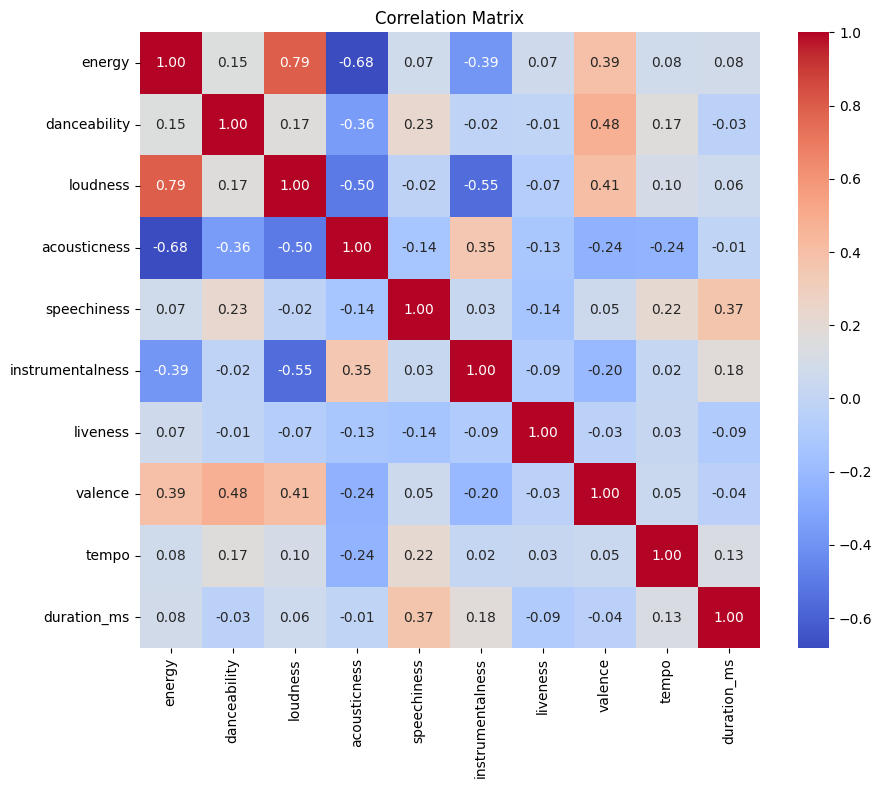

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
numeric_df = spot_tracks.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

To calculate the strong positive and negative correlation, the following analysis was performed:

* It was considered that the strong correlation coefficient should be greater than 0.8 and less than 1(which is the perfect correlation) and less than -0.8 and greater than -1 (which is the perfect negative correlation).
* A lambda function was used to select the correlation coefficients that meet the criteria, being:
    * *correlation_matrix.index[i]* -> retrieves the label (or name) of the row corresponding to the i-th index;
    * *correlation_matrix.columns[j]* -> retrieves the label (or name) of the column corresponding to the j-th index.
    * *correlation_matrix.iloc[i, j]* -> is used to access the value of the correlation coefficient located at row i and column j.
    * *for i, j in zip(indices[0], indices[1]):* -> zip(indices[0], indices[1]) creates pairs of values from the row and column indices obtained from indices[0] and indices[1] respectively. The for loop iterates over these pairs of indices.
    * For each pair of indices (i, j), the list comprehension constructs a tuple (correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]). This tuple consists of the row label, column label, and the corresponding correlation coefficient.

In [33]:
import numpy as np

# Compute the correlation matrix
correlation_matrix = spot_tracks.select_dtypes(include=["float64", "int64"]) \
    .corr()

# Rounding correlation result to 2 decimals
correlation_matrix_rounded = correlation_matrix.round(2)

# Find the indices where correlation coefficients
indices = np.nonzero((correlation_matrix > 0.7) & (correlation_matrix < 1))

# Extract the indices and corresponding correlation coefficients
strongly_positively_correlated = [
    (
        correlation_matrix.index[i],
        correlation_matrix.columns[j],
        correlation_matrix_rounded.iloc[i, j],
    )
    for i, j in zip(indices[0], indices[1])
]

print("Strongly positively correlated features:")
print(strongly_positively_correlated)

Strongly positively correlated features:
[('energy', 'loudness', 0.79), ('loudness', 'energy', 0.79)]


### Which features are strongly negatively correlated?

In [34]:
import numpy as np

# Compute the correlation matrix
correlation_matrix = spot_tracks.select_dtypes(include=["float64", "int64"]) \
    .corr()

# Rounding correlation result to 2 decimals
correlation_matrix_rounded = correlation_matrix.round(2)

# Find the indices where correlation coefficients
indices = np.nonzero((correlation_matrix < -0.7) & (correlation_matrix > -1))

# Extract the indices and corresponding correlation coefficients
strongly_negatively_correlated = [
    (
        correlation_matrix.index[i],
        correlation_matrix.columns[j],
        correlation_matrix_rounded.iloc[i, j],
    )
    for i, j in zip(indices[0], indices[1])
]

print("Strongly negatively correlated features:")
print(strongly_negatively_correlated)

Strongly negatively correlated features:
[]


### Which features are not correlated?

For this analysis, the following criteria was used:
* *correlation_matrix* variable -> to determine the correlation between the numeric features.
* *uncorrelated_features* variable -> an empty list to store the names of features that are not correlated with any other features.
* *for column in correlation_matrix.columns* -> iterates over each column in the correlation matrix.
* *if all(abs(correlation_matrix[column]) < 0.1):* -> checks if the absolute value of the correlation coefficient between the current column and all other columns is less than 0.1. If this condition is true, the column is uncorrelated with all other columns.
* *uncorrelated_features.append(column)* -> appends the name of the uncorrelated column to the list of uncorrelated features.

In [36]:
# Compute the correlation matrix
correlation_matrix = spot_tracks.select_dtypes(include=["float64", "int64"]) \
    .corr()

# Find features with correlation coefficients close to zero
uncorrelated_features = []

for column in correlation_matrix.columns:
    # Check if the absolute correlation coefficient close to zero
    if any(abs(correlation_matrix[column]) < 0.1):
        uncorrelated_features.append(column)

print("Uncorrelated features:")
print(uncorrelated_features)

Uncorrelated features:
['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


### How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

To compare the danceability score, the mean function was used, since it provides the average value for the danceability score for each genre. Mean refers to the arithmetic average of a set of numbers, which is the sum of the numbers divided by the quantity of numbers.

Therefore, it is a method that can be used to compare the danceability score between the genres.

In [37]:
# Filter the DataFrame by genre
pop_df = spot_tracks[spot_tracks["genre"] == "Pop"]
hiphop_df = spot_tracks[spot_tracks["genre"] == "Hip-Hop/Rap"]
dance_df = spot_tracks[spot_tracks["genre"] == "Dance/Electronic"]
indie_df = spot_tracks[spot_tracks["genre"] == "Alternative/Indie"]

# Compute the mean danceability score for each genre
mean_danceability_pop = pop_df["danceability"].mean().round(2)
mean_danceability_hiphop = hiphop_df["danceability"].mean().round(2)
mean_danceability_dance = dance_df["danceability"].mean().round(2)
mean_danceability_indie = indie_df["danceability"].mean().round(2)

# Print the results
print("Mean Danceability Score:")
print("Pop:", mean_danceability_pop)
print("Hip-Hop/Rap:", mean_danceability_hiphop)
print("Dance/Electronic:", mean_danceability_dance)
print("Alternative/Indie:", mean_danceability_indie)

Mean Danceability Score:
Pop: 0.68
Hip-Hop/Rap: 0.77
Dance/Electronic: 0.76
Alternative/Indie: 0.66


### How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

As used previously, to compare the loudness score, the mean function was used, since it provides the average value for the loudness score for each genre.

Therefore, it is a metric that can be used to compare the loudness score between the genres.

In [38]:
# Filter the DataFrame by genre
pop_df = spot_tracks[spot_tracks["genre"] == "Pop"]
hiphop_df = spot_tracks[spot_tracks["genre"] == "Hip-Hop/Rap"]
dance_df = spot_tracks[spot_tracks["genre"] == "Dance/Electronic"]
indie_df = spot_tracks[spot_tracks["genre"] == "Alternative/Indie"]

# Compute the mean loudness score for each genre
mean_loudness_pop = pop_df["loudness"].mean().round(2)
mean_loudness_hiphop = hiphop_df["loudness"].mean().round(2)
mean_loudness_dance = dance_df["loudness"].mean().round(2)
mean_loudness_indie = indie_df["loudness"].mean().round(2)

# Print the results
print("Mean Loudness Score:")
print("Pop:", mean_loudness_pop)
print("Hip-Hop/Rap:", mean_loudness_hiphop)
print("Dance/Electronic:", mean_loudness_dance)
print("Alternative/Indie:", mean_loudness_indie)

Mean Loudness Score:
Pop: -6.46
Hip-Hop/Rap: -6.92
Dance/Electronic: -5.34
Alternative/Indie: -5.42


### How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

As used previously, to compare the accousticness score, the mean function was used, since it provides the average value for the accousticness score for each genre.

Therefore, it is a metric that can be used to compare the accousticness score between the genres.

In [39]:
# Filter the DataFrame by genre
pop_df = spot_tracks[spot_tracks["genre"] == "Pop"]
hiphop_df = spot_tracks[spot_tracks["genre"] == "Hip-Hop/Rap"]
dance_df = spot_tracks[spot_tracks["genre"] == "Dance/Electronic"]
indie_df = spot_tracks[spot_tracks["genre"] == "Alternative/Indie"]

# Compute the mean acousticness score for each genre
mean_acousticness_pop = pop_df["acousticness"].mean().round(2)
mean_acousticness_hiphop = hiphop_df["acousticness"].mean().round(2)
mean_acousticness_dance = dance_df["acousticness"].mean().round(2)
mean_acousticness_indie = indie_df["acousticness"].mean().round(2)

# Print the results
print("Mean Acousticness Score:")
print("Pop:", mean_acousticness_pop)
print("Hip-Hop/Rap:", mean_acousticness_hiphop)
print("Dance/Electronic:", mean_acousticness_dance)
print("Alternative/Indie:", mean_acousticness_indie)

Mean Acousticness Score:
Pop: 0.32
Hip-Hop/Rap: 0.19
Dance/Electronic: 0.1
Alternative/Indie: 0.58


### Provide suggestions about how your analysis can be improved.

I believe in the general, the code can be more efficient and the analysis can be more detailed. For example, the analysis of the genres can be more detailed, showing the correlation between the genres and the features, and also the correlation between the genres and the artists.
In general the code is very simple and can be improved in many ways, like using functions to avoid repetition of code, and also using more complex functions to analyze the data, but I think it is a good start to understand the dataset and the features.

### What advantages do NumPy arrays have over Python lists?

* NumPy arrays are more memory efficient and faster compared to Python lists, especially for large datasets, due to memory efficiency, faster computations, and vectorized operations. Python lists are implemented as arrays of pointers to objects, which introduces overhead due to the need to store the pointers and the objects themselves, leading to higher memory consumption. NumPy arrays, on the other hand, are implemented as contiguous blocks of memory, which allows for more efficient storage and access to the data. Also Python lists require explicit looping to perform operations on each element, which can be slower compared to vectorized operations.

* NumPy arrays can be multi-dimensional, allowing for efficient storage and manipulation of multi-dimensional data.

* Mathematical functions and operations that can be applied directly to arrays, making numerical computations more convenient and efficient.

* Vectorized operations refer to the ability to perform operations on entire arrays of data, rather than on individual elements.

    Please find below a brief example to ilustrate the concept above.

In [42]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

# Scalar multiplication
result_1 = arr * 2
print(result_1)

# Element-wise addition
result_2 = arr + 10
print(result_2)

# Element-wise square root
result_3 = np.sqrt(arr)
print(result_3)

# Element-wise comparison
result_4 = arr > 3
print(result_4)

[ 2  4  6  8 10]
[11 12 13 14 15]
[1.         1.41421356 1.73205081 2.         2.23606798]
[False False False  True  True]


### What makes computation on NumPy arrays so fast?

* NumPy arrays are implemented in C, which allows for faster execution compared to Python lists, which are interpreted.

* NumPy arrays use contiguous blocks of memory, which enables efficient vectorized operations and reduces overhead (such as memory and processing time, required to manage and perform operations on arrays beyond the actual data itself.)

### What are the rules of broadcasting?

* Broadcasting is the term used to describe how NumPy handles operations between arrays with different shapes. The rules of broadcasting allow arrays with different shapes to be combined in arithmetic operations.
* Broadcasting follows these rules:
    * If the arrays have a different number of dimensions, the shape of the smaller array is padded with ones on the left until its shape matches the shape of the larger array.
    * If the arrays have the same number of dimensions, but the shape of one dimension does not match, the array with shape equal to 1 in that dimension is stretched to match the shape of the other array.
    * If the arrays have different shapes and neither array has a shape equal to 1 in any dimension, broadcasting is not possible and an error will be raised.

Please, find below an example of the code used to ilustrate the questions above.

In [40]:
import numpy as np

# Define two NumPy arrays with different shapes
array1 = np.array([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
array2 = np.array([10, 20, 30])  # Shape: (3,)

# Perform element-wise addition using broadcasting
result = array1 + array2

print("Array 1:")
print(array1)
print("\nArray 2:")
print(array2)
print("\nResult of Addition:")
print(result)

Array 1:
[[1 2 3]
 [4 5 6]]

Array 2:
[10 20 30]

Result of Addition:
[[11 22 33]
 [14 25 36]]


### What advantages do Pandas have over NumPy?

* Pandas provides a DataFrame object, which is a labeled, two-dimensional data structure that can store data of different types in columns.

* Pandas offers more flexibility and functionality for data manipulation and analysis compared to NumPy arrays, especially for tabular data.

* Pandas provides powerful tools for handling missing data, time-series data, and performing data alignment and reshaping operations, such as isnull() and notnull(), dropna(), fillna(), resample(), concat(), merge() and other.

* Pandas integrates seamlessly with other libraries in the Python data ecosystem, such as Matplotlib, Scikit-learn, and others.

### What is a DataFrame in Pandas?

* A DataFrame is a primary data structure in Pandas, which represents tabular data with rows and columns.

* It is a two-dimensional, size-mutable, and heterogeneous data structure, meaning it can contain data of different types.

* Each column in a DataFrame is a Pandas Series, which is a one-dimensional labeled array.

* DataFrames provide powerful methods and functions for data manipulation, cleaning, analysis, and visualization, such as head() and tail(), describe(), loc[] and iloc[], drop() and dropna(), drop_duplicates(), sum(), mean(), corr(), plot() and others.

* DataFrames can be created from various data sources, including dictionaries, lists, NumPy arrays, CSV files, Excel files, databases, and more.